In [2]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

In [4]:
data= pd.read_csv('book_reviews_sample.csv')

In [5]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [6]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [7]:
data['reviewtext_clean']=data['reviewText'].str.lower()

In [8]:
data['reviewtext_clean']=data.apply(lambda x: re.sub(r"([^\w\s])","", x['reviewtext_clean']), axis=1)

In [9]:
data.head()

,index,reviewText,rating,reviewtext_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [10]:
vader_sentiment = SentimentIntensityAnalyzer() 

In [11]:
data['vader_sentiment_score'] = data['reviewtext_clean'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [12]:
data.head()

,index,reviewText,rating,reviewtext_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [13]:
bins = [-1, -0.1, 0.1, 1]
names= ['neagative', 'neutral', 'positive']

data['vader_sentiment_label']= pd.cut(data['vader_sentiment_score'], bins, labels=names)

In [14]:
data.head()

,index,reviewText,rating,reviewtext_clean,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,neagative


<Axes: xlabel='vader_sentiment_label'>

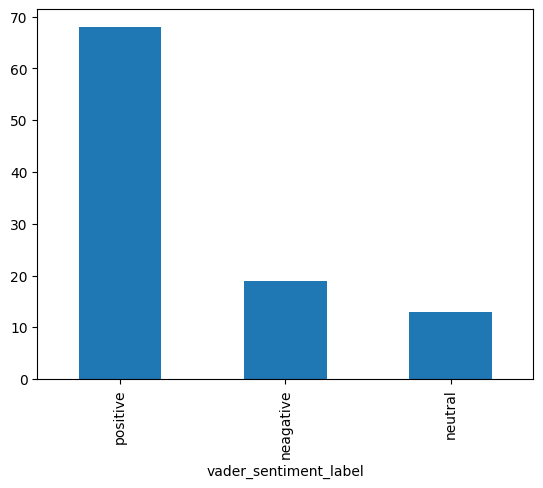

In [15]:
import matplotlib.pyplot as plt

data['vader_sentiment_label'].value_counts().plot.bar()

In [17]:
transformer_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [19]:
transformer_labels = []

for review in data['reviewtext_clean'].values:
    sentiment_list=transformer_pipeline(review)
    sentiment_label= [sent['label' ] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)


data['transformer_sentiment_label']= transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

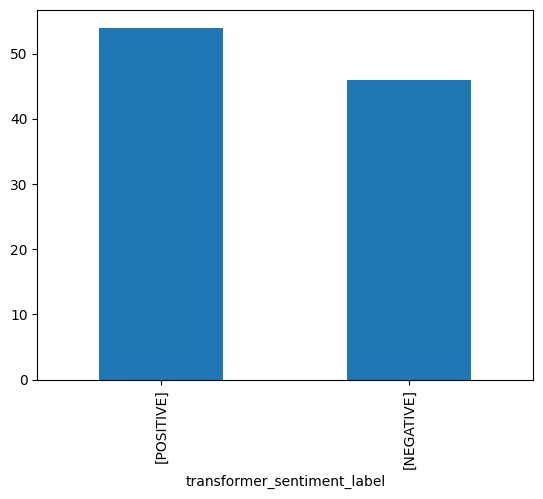

In [21]:
data['transformer_sentiment_label'].value_counts().plot.bar()